<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

### 1.2 NumPy’s PRNG

In [2]:
np.random.rand()                # Give one number between 0 and 1

0.34022637018421986

In [3]:
np.random.rand(10)              # Give ten numbers`

array([0.14518291, 0.58391266, 0.29013809, 0.29471131, 0.17072272,
       0.07502478, 0.24891313, 0.06363241, 0.46491001, 0.13861426])

In [4]:
np.random.rand(5,2)             # Give five sets of 2

array([[0.45916739, 0.34661199],
       [0.75921867, 0.33506002],
       [0.32440815, 0.91603364],
       [0.47887926, 0.98739699],
       [0.5719737 , 0.00972653]])

### 1.3 A simple graphical test

In [5]:
n = 10000
random_numbers = np.random.rand(n)

In [6]:
# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

49.54

In [7]:
# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100

24.51

In [8]:
# The numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

25.52

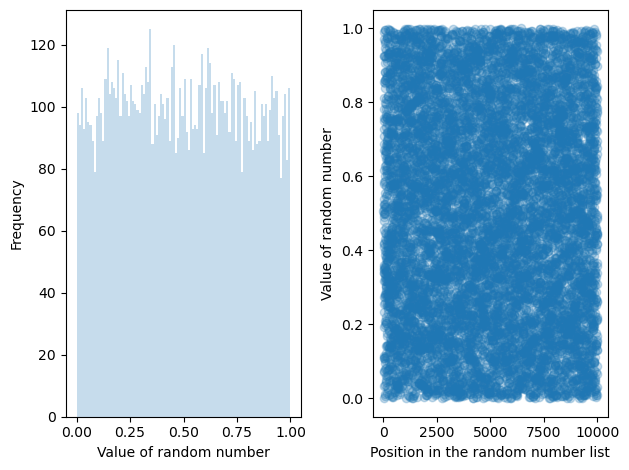

In [9]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.tight_layout()

### 1.4 Uniformly beyond \([0,1)\)

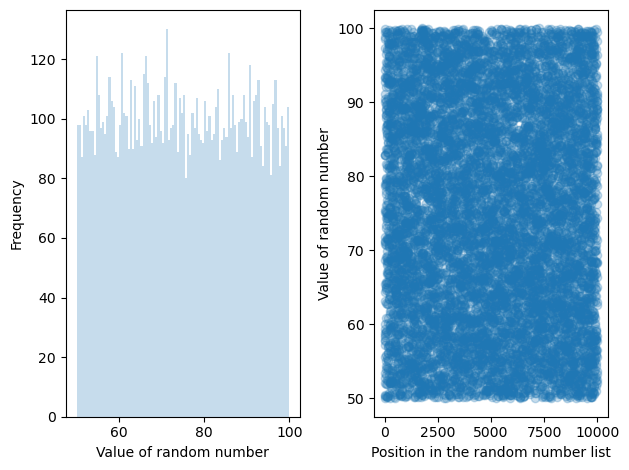

In [10]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.tight_layout()

### 1.5 ‘seeding’ a PRNG

In [11]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([95, 45, 77,  3, 29,  1, 10, 78, 60, 82])

In [12]:
np.random.randint(0, 100, 10)     # Another ten integers between 0 and 100

array([89, 65,  6, 79, 55, 27, 81, 61, 23,  0])

In [13]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [14]:
np.random.seed(1234)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [15]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

In [16]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Ask again later.

Q: Will I be rich?
A: Better not tell you now.

Q: Will I be in trouble?
A: My reply is no.



## 3 Flipping Coins

### 3.1 A fair coin

In [17]:
np.random.choice(['Head', 'Tails'])

'Head'

In [18]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Tails', 'Head', 'Tails', 'Tails', 'Head', 'Head', 'Tails', 'Head',
       'Head', 'Tails'], dtype='<U5')

In [19]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
#     print(results>probability)    # if results > probability, will give True
    return no_of_heads

In [20]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 51.60%


### 3.2 A biased coin

In [21]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 66.70%


### 3.3 A flipping experiment

In [22]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)   # returns the unique values (of Heads) in the list and how many times they occur
# print(result)
print(no_of_heads)
print(heads_counts)

heads_probability = heads_counts/no_of_repeats
print(heads_probability)

[ 0  1  2  3  4  5  6  7  8  9 10]
[  10  100  426 1217 2088 2376 2025 1184  471   95    8]
[0.001  0.01   0.0426 0.1217 0.2088 0.2376 0.2025 0.1184 0.0471 0.0095
 0.0008]


In [41]:
#binomial theorem

binom.pmf(k=7, n=10, p=.5)
# k = test (how many heads you want)
# n = max number for test (how many heads is possible)
# p = probability of single success

binomial_probabilities = np.round(binom.pmf(k=no_of_heads, n=10, p=.5),decimals=4)

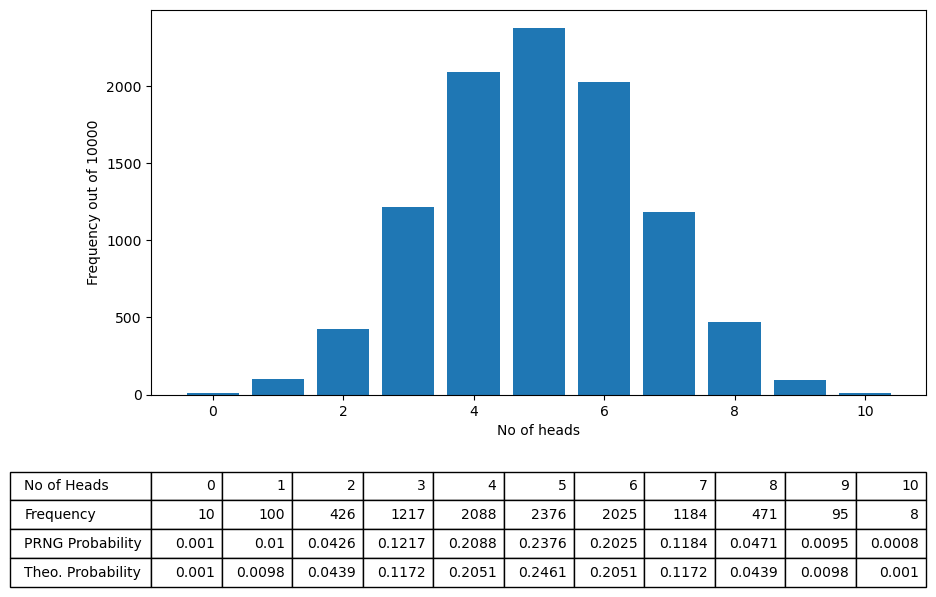

In [42]:
plt.rcParams['figure.figsize'] = (10,5)  # to set the rc parameters, use plt.rcdefaults() to restore
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability,binomial_probabilities],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability','Theo. Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])
plt.show()

## Exercise 1 :  12C, 13C

In [25]:
# mean and standard deviation for the number of C13 atoms in C27H44O

pC12 = 0.9889
pC13 = 0.0111
C_no = 27

def C13(n = 1,p = pC12):
    random = np.random.rand(n)
    C13_no = np.sum(random > p)
    return C13_no

repeats = 1000
results = [C13(n=C_no,p=pC12) for i in range(repeats)]

C13_no, C13_no_f = np.unique(results, return_counts = True)

print(C13_no)
print(C13_no_f)

C13_mean = np.sum(C13_no*C13_no_f)/repeats
C13_sd = np.sqrt(np.sum(((C13_no - C13_mean)**2)*C13_no_f)/repeats)

print(C13_mean)
print(C13_sd)

results2 = np.array([])
for i,f in enumerate(C13_no_f):
    for n in range(f):
        results2 = np.append(results2,C13_no[i])

C13_mean2 = np.mean(results2)
C13_sd2 = np.std(results2)

print(C13_mean2)
print(C13_sd2)

[0 1 2 3]
[746 222  30   2]
0.288
0.5263610927870713
0.288
0.5263610927870713


In [26]:
# probability that C27H44O have no C13

p_of_C13 = (C13_no_f/repeats)

print(p_of_C13[0])

0.746


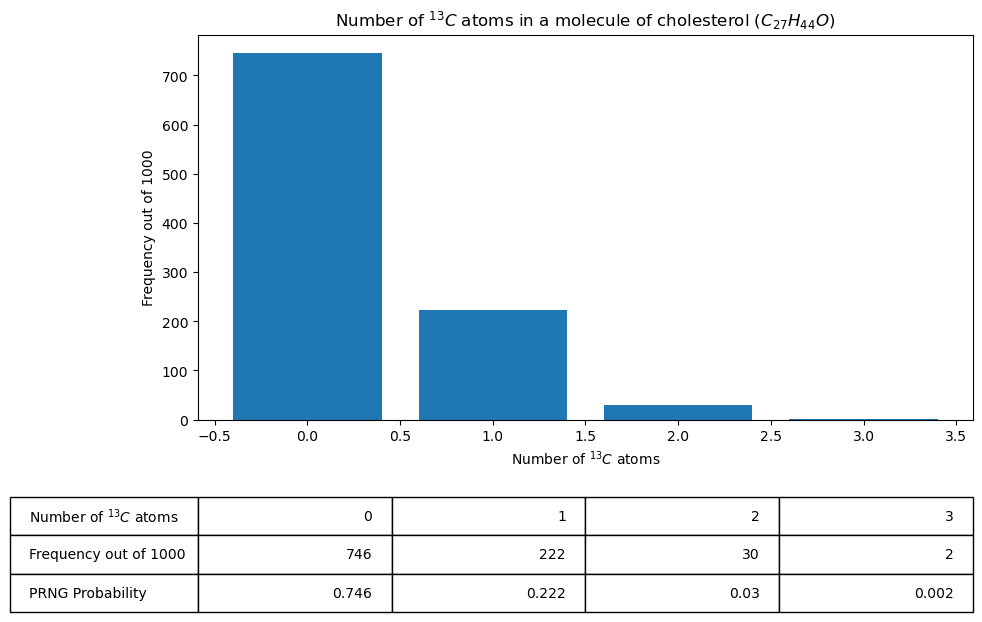

In [27]:
plt.bar(C13_no,C13_no_f)
plt.title('Number of $^{13}C$ atoms in a molecule of cholesterol ($C_{27}H_{44}O$)')
plt.xlabel('Number of $^{13}C$ atoms')
plt.ylabel(f'Frequency out of {repeats}')
plt.table([C13_no,C13_no_f,C13_no_f/repeats], 
          rowLabels=['Number of $^{13}C$ atoms',f'Frequency out of {repeats}','PRNG Probability'],
          bbox=[0,-0.5,1,0.3])
plt.show()